In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Check if folder input exists

# Define the folder name
folder_name = '../input'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../input' folder already exists.


In [3]:
# Webscrapping Wikipedia table to get the SP500 components
page = requests.get("https://en.wikipedia.org/wiki/Swiss_Market_Index")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table', class_="wikitable sortable")

In [4]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Rank,Name,Industry,Ticker,Canton,Weighting in %
0,1,Nestlé SA,Food,NESN.SW,Vaud,19[1]
1,2,Roche Holding AG,Pharmacy,ROG.SW,Basel,17[1]
2,3,Novartis International AG,Pharmacy,NOVN.SW,Basel,17[1]
3,4,Compagnie Financière Richemont SA,Luxury Goods,CFR.SW,Geneva,7[1]
4,5,Zurich Insurance Group AG,Insurance,ZURN.SW,Zurich,6[1]
5,6,UBS Group AG,Banks,UBSG.SW,Zurich/Basel,5[1]
6,7,ABB Ltd,Electrical equipment,ABBN.SW,Zurich,4[1]
7,8,Lonza Group AG,Chemistry,LONN.SW,Basel,4[1]
8,9,Sika AG,Chemistry,SIKA.SW,Zug,3[1]
9,10,Alcon Inc,Pharmacy,ALC.SW,Fribourg,3[1]


In [5]:
# Get the data for the stock
index_list = wiki['Ticker'].tolist()
index_list.append('^SSMI')

In [6]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False,multi_level_index=False,actions=True,auto_adjust=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/21 [00:00<?, ?it/s]

In [7]:
# Configuration of different parameters of the notebook
ticker = '^SSMI'
year = '2025'

In [8]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
1990-11-09,1387.099976,1387.099976,0.0,1389.000000,1375.300049,1378.900024,0.0,0
1990-11-12,1407.500000,1407.500000,0.0,1408.099976,1388.099976,1388.099976,0.0,0
1990-11-13,1415.199951,1415.199951,0.0,1429.400024,1411.400024,1412.199951,0.0,0
1990-11-14,1410.300049,1410.300049,0.0,1413.599976,1402.099976,1413.599976,0.0,0
1990-11-15,1405.699951,1405.699951,0.0,1416.699951,1405.099976,1410.599976,0.0,0
1990-11-16,1395.199951,1395.199951,0.0,1407.400024,1389.400024,1405.699951,0.0,0
1990-11-19,1416.000000,1416.000000,0.0,1417.900024,1395.599976,1395.599976,0.0,0
1990-11-20,1405.800049,1405.800049,0.0,1415.000000,1404.699951,1414.800049,0.0,0
1990-11-21,1398.400024,1398.400024,0.0,1405.599976,1396.699951,1405.599976,0.0,0


In [9]:
# Check DataFrame tail
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2025-02-21,12948.599609,12948.599609,0.0,12948.599609,12788.500000,12835.469727,0.0,37951700
2025-02-24,12953.169922,12953.169922,0.0,13016.639648,12899.809570,12951.500000,0.0,26455200
2025-02-25,13025.009766,13025.009766,0.0,13040.360352,12914.110352,12919.349609,0.0,34037000
2025-02-26,13042.509766,13042.509766,0.0,13100.219727,12993.650391,12994.419922,0.0,38782500
2025-02-27,12958.339844,12958.339844,0.0,13026.969727,12921.940430,12957.209961,0.0,29764900
2025-02-28,13004.480469,13004.480469,0.0,13020.650391,12884.269531,12914.250000,0.0,61420900
2025-03-03,13166.679688,13166.679688,0.0,13199.049805,12956.839844,13032.860352,0.0,30859800
2025-03-04,13006.740234,13006.740234,0.0,13146.919922,12991.809570,13099.490234,0.0,38551000
2025-03-05,13112.750000,13112.750000,0.0,13161.900391,13066.219727,13081.209961,0.0,38270100


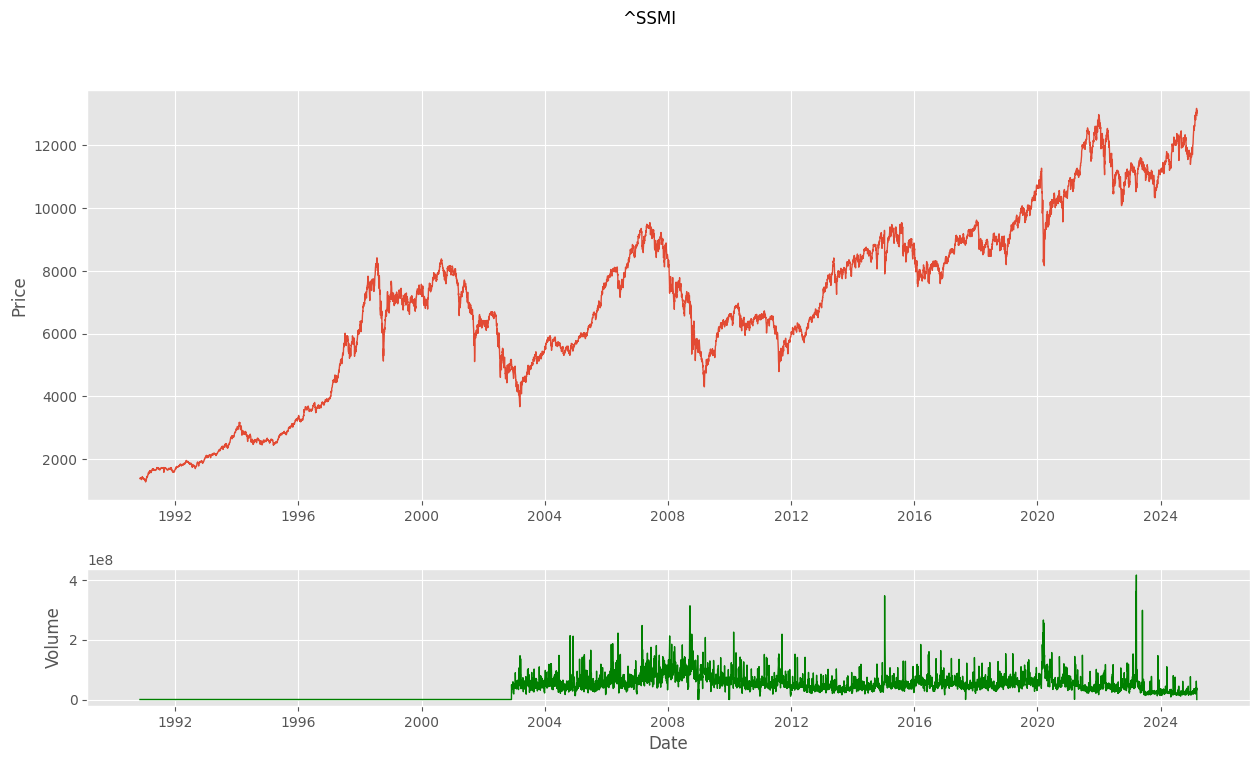

In [10]:
# Plot the adjusted close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [11]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [12]:
# Group per year and calculate cummulative return
stock_ticker['Year'] = stock_ticker.index.year
annual_data = stock_ticker.groupby('Year').agg(Adj_Close=('Adj Close','last'))
annual_data['Return'] = annual_data["Adj_Close"].pct_change()*100
annual_data

,Adj_Close,Return
Year,,
1990,1383.099976,NaN
1991,1670.099976,20.750488
1992,2107.000000,26.160112
1993,2957.600098,40.370199
1994,2628.800049,-11.117123
1995,3297.699951,25.445066
1996,3942.199951,19.543925
1997,6265.500000,58.934100
1998,7160.700195,14.287769


In [13]:
# Plotly
fig = make_subplots()

# Add colors
colors = ['green' if x >= 0 else 'red' for x in annual_data['Return']]

# Graph (1,1)
fig.add_trace(go.Bar(y=annual_data['Return'],x=annual_data['Return'].index,text=round(annual_data['Return'],2),textposition='outside',marker_color=colors,hoverinfo='skip'),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Returns", row=1, col=1)

fig.update_layout(xaxis=dict(tickvals=annual_data.index,tickangle=-45),height=800, width=1300,title=f"Returns per year {ticker}")

fig.show()

In [14]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

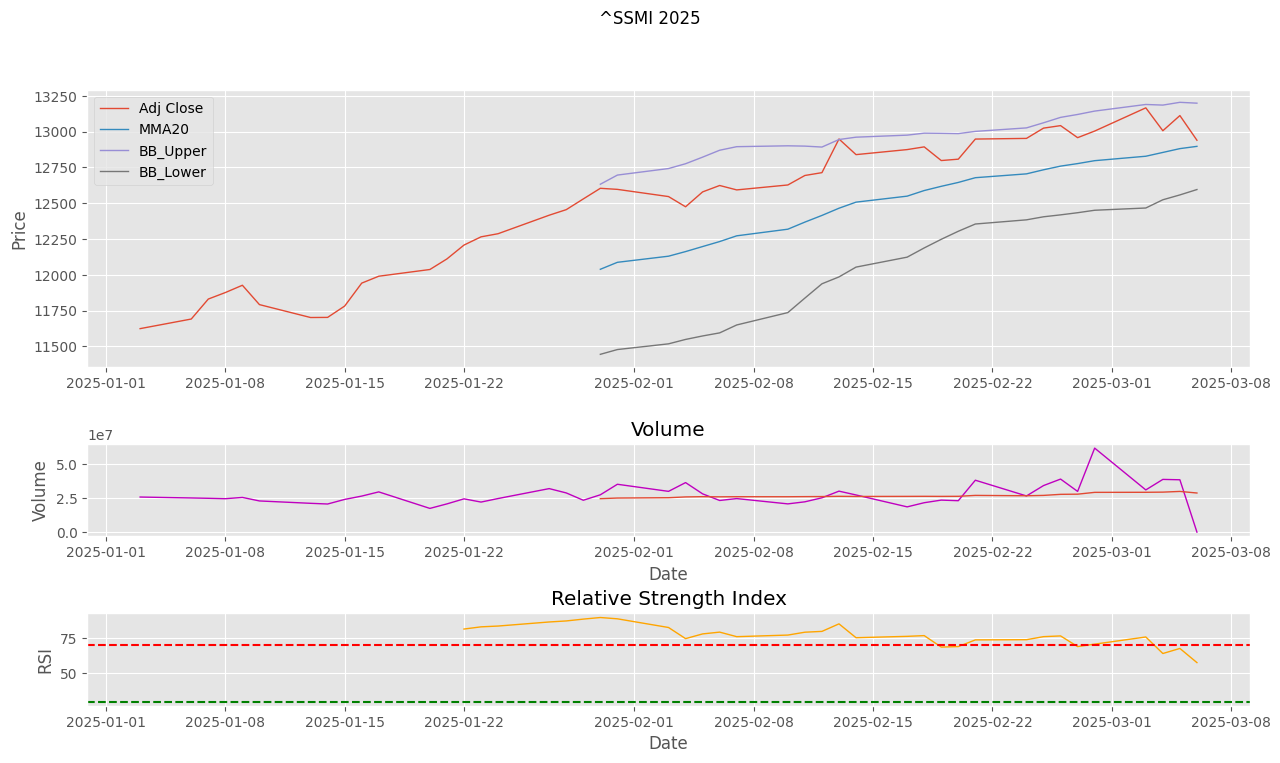

In [15]:
# Plot the adjusted close price
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [16]:
# Plot the adjusted close price
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [17]:
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Year,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,,,,
2025-02-21,12948.599609,12948.599609,0.0,12948.599609,12788.500000,12835.469727,0.0,37951700,2025,12678.616553,13002.192979,12355.040127,73.564892,1.097116
2025-02-24,12953.169922,12953.169922,0.0,13016.639648,12899.809570,12951.500000,0.0,26455200,2025,12705.444531,13026.644161,12384.244901,73.704519,0.035296
2025-02-25,13025.009766,13025.009766,0.0,13040.360352,12914.110352,12919.349609,0.0,34037000,2025,12733.922998,13062.326846,12405.519150,75.862676,0.554612
2025-02-26,13042.509766,13042.509766,0.0,13100.219727,12993.650391,12994.419922,0.0,38782500,2025,12759.532471,13100.090917,12418.974025,76.371418,0.134357
2025-02-27,12958.339844,12958.339844,0.0,13026.969727,12921.940430,12957.209961,0.0,29764900,2025,12777.222461,13120.484250,12433.960672,68.854438,-0.645351
2025-02-28,13004.480469,13004.480469,0.0,13020.650391,12884.269531,12914.250000,0.0,61420900,2025,12797.591992,13144.014672,12451.169313,70.564810,0.356069
2025-03-03,13166.679688,13166.679688,0.0,13199.049805,12956.839844,13032.860352,0.0,30859800,2025,12828.587500,13190.289796,12466.885204,75.631006,1.247256
2025-03-04,13006.740234,13006.740234,0.0,13146.919922,12991.809570,13099.490234,0.0,38551000,2025,12855.150000,13185.934566,12524.365434,63.943926,-1.214729
2025-03-05,13112.750000,13112.750000,0.0,13161.900391,13066.219727,13081.209961,0.0,38270100,2025,12881.815479,13205.300619,12558.330338,67.525869,0.815037


  0%|          | 0/21 [00:00<?, ?it/s]

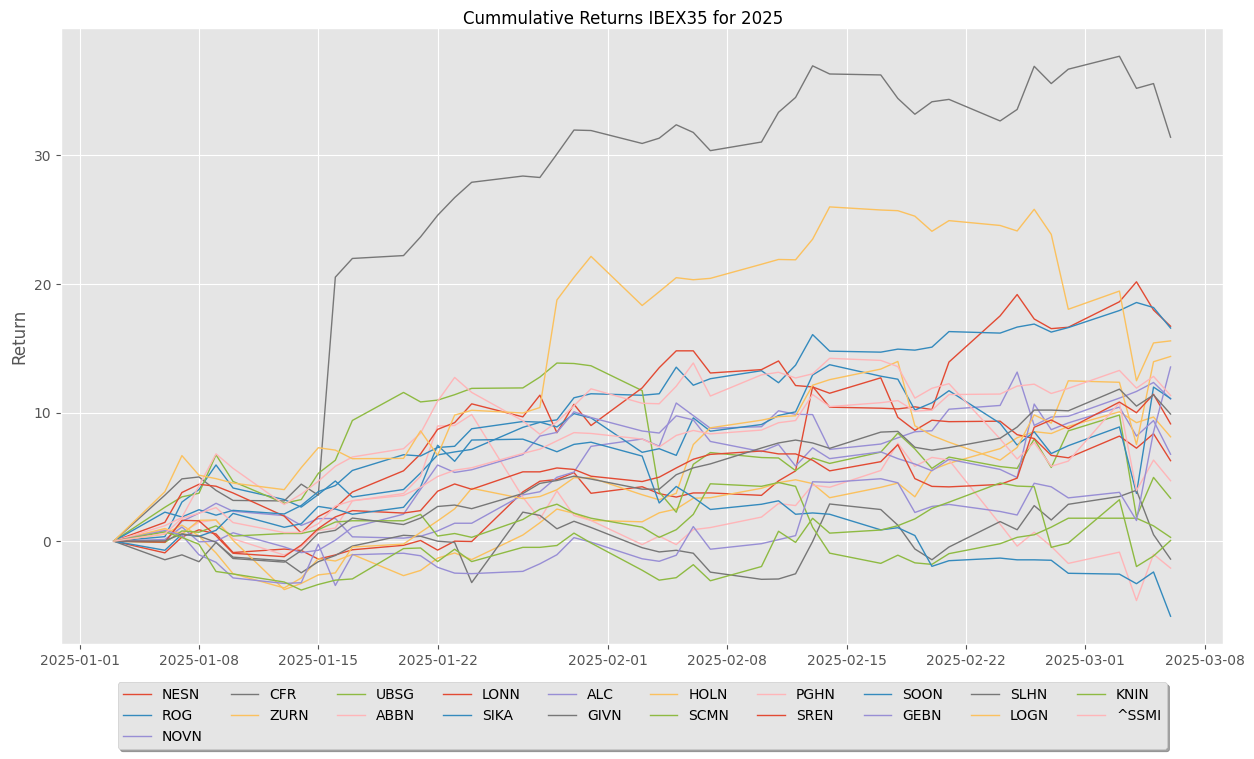

In [18]:
# Plot Cummulative Returns
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [19]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/21 [00:00<?, ?it/s]

In [20]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/21 [00:00<?, ?it/s]

,Ticker,Name,Date,Cummulative_Return
0,CFR.SW,Compagnie Financière Richemont SA,2025-03-06,31.396643
1,NESN.SW,Nestlé SA,2025-03-06,16.706832
2,ROG.SW,Roche Holding AG,2025-03-06,16.562743
3,LOGN.SW,Logitech International SA,2025-03-06,15.567418
4,HOLN.SW,Holcim Limited,2025-03-06,14.357446
5,GEBN.SW,Geberit AG,2025-03-06,13.536778
6,SIKA.SW,Sika AG,2025-03-06,11.085020
7,NOVN.SW,Novartis International AG,2025-03-06,11.053701
8,SLHN.SW,Swiss Life Holding AG,2025-03-06,9.879319
9,SREN.SW,Swiss Reinsurance Company Ltd,2025-03-06,9.118317


In [21]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).head(30)

,Ticker,Name,Date,Cummulative_Return
0,CFR.SW,Compagnie Financière Richemont SA,2025-03-06,31.396643
1,NESN.SW,Nestlé SA,2025-03-06,16.706832
2,ROG.SW,Roche Holding AG,2025-03-06,16.562743
3,LOGN.SW,Logitech International SA,2025-03-06,15.567418
4,HOLN.SW,Holcim Limited,2025-03-06,14.357446
5,GEBN.SW,Geberit AG,2025-03-06,13.536778
6,SIKA.SW,Sika AG,2025-03-06,11.085020
7,NOVN.SW,Novartis International AG,2025-03-06,11.053701
8,SLHN.SW,Swiss Life Holding AG,2025-03-06,9.879319
9,SREN.SW,Swiss Reinsurance Company Ltd,2025-03-06,9.118317
